In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17483, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 17483 (delta 79), reused 30 (delta 30), pack-reused 17374 (from 4)
Receiving objects: 100% (17483/17483), 16.39 MiB | 16.88 MiB/s, done.
Resolving deltas: 100% (11984/11984), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s

In [ ]:
# Replace with your actual export link from Roboflow
!curl -L "https://universe.roboflow.com/ds/pseR9cD5Di?key=GvpJTvsXyx" > roboflow.zip
!unzip roboflow.zip -d /content/dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   910  100   910    0     0   1756      0 --:--:-- --:--:-- --:--:--  1760
100 6644k  100 6644k    0     0  1670k      0  0:00:03  0:00:03 --:--:-- 2946k
Archive:  roboflow.zip
  inflating: /content/dataset/README.dataset.txt  
  inflating: /content/dataset/README.roboflow.txt  
  inflating: /content/dataset/data.yaml  
   creating: /content/dataset/test/
   creating: /content/dataset/test/images/
 extracting: /content/dataset/test/images/-4K-1_-Av335688642-P1-_mp4-0005_jpg.rf.400320a659499fdf96dea882e75c4f32.jpg  
 extracting: /content/dataset/test/images/-4K-1_-Av335688642-P1-_mp4-0030_jpg.rf.14e6f2024aec8efe2bf45b40c01d5819.jpg  
 extracting: /content/dataset/test/images/-4K-1_-Av335688642-P1-_mp4-0065_jpg.rf.17100ccd79f3de7b4c930c6c8066c757.jpg  
 extracting: /content/dataset/test/images/-4K-1_-Av335688642-P1-_mp4-0089_jpg

In [ ]:
data_yaml = """
train: /content/dataset/train/images
val: /content/dataset/valid/images

nc: 1
names: ['Civilian']
"""

with open('/content/yolov5/roboflow_data.yaml', 'w') as f:
    f.write(data_yaml)

In [ ]:
import os

label_dirs = ['/content/dataset/train/labels', '/content/dataset/valid/labels']
invalid_labels = []

for label_dir in label_dirs:
    for file in os.listdir(label_dir):
        path = os.path.join(label_dir, file)
        with open(path, 'r') as f:
            lines = f.readlines()

        new_lines = []
        changed = False
        for line in lines:
            class_id = int(line.split()[0])
            if class_id != 0:
                invalid_labels.append((file, class_id))
                # Option 1: Skip this object
                # continue

                # Option 2: Remap all to class 0
                line = '0 ' + ' '.join(line.split()[1:]) + '\n'
                changed = True
            new_lines.append(line)

        if changed:
            with open(path, 'w') as f:
                f.writelines(new_lines)

if invalid_labels:
    print("Found non-zero class IDs in:")
    for fname, cls in invalid_labels:
        print(f" - {fname} had class ID {cls}")
else:
    print("✅ All label files are clean — only class 0 found.")


✅ All label files are clean — only class 0 found.


In [ ]:
!python train.py \
    --img 640 \
    --batch 16 \
    --epochs 30 \
    --data roboflow_data.yaml \
    --cfg models/yolov5n.yaml \
    --weights yolov5n.pt \
    --name yolov5n_results


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-26 12:25:35.228434: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748262335.542185    1045 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748262335.619755    1045 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

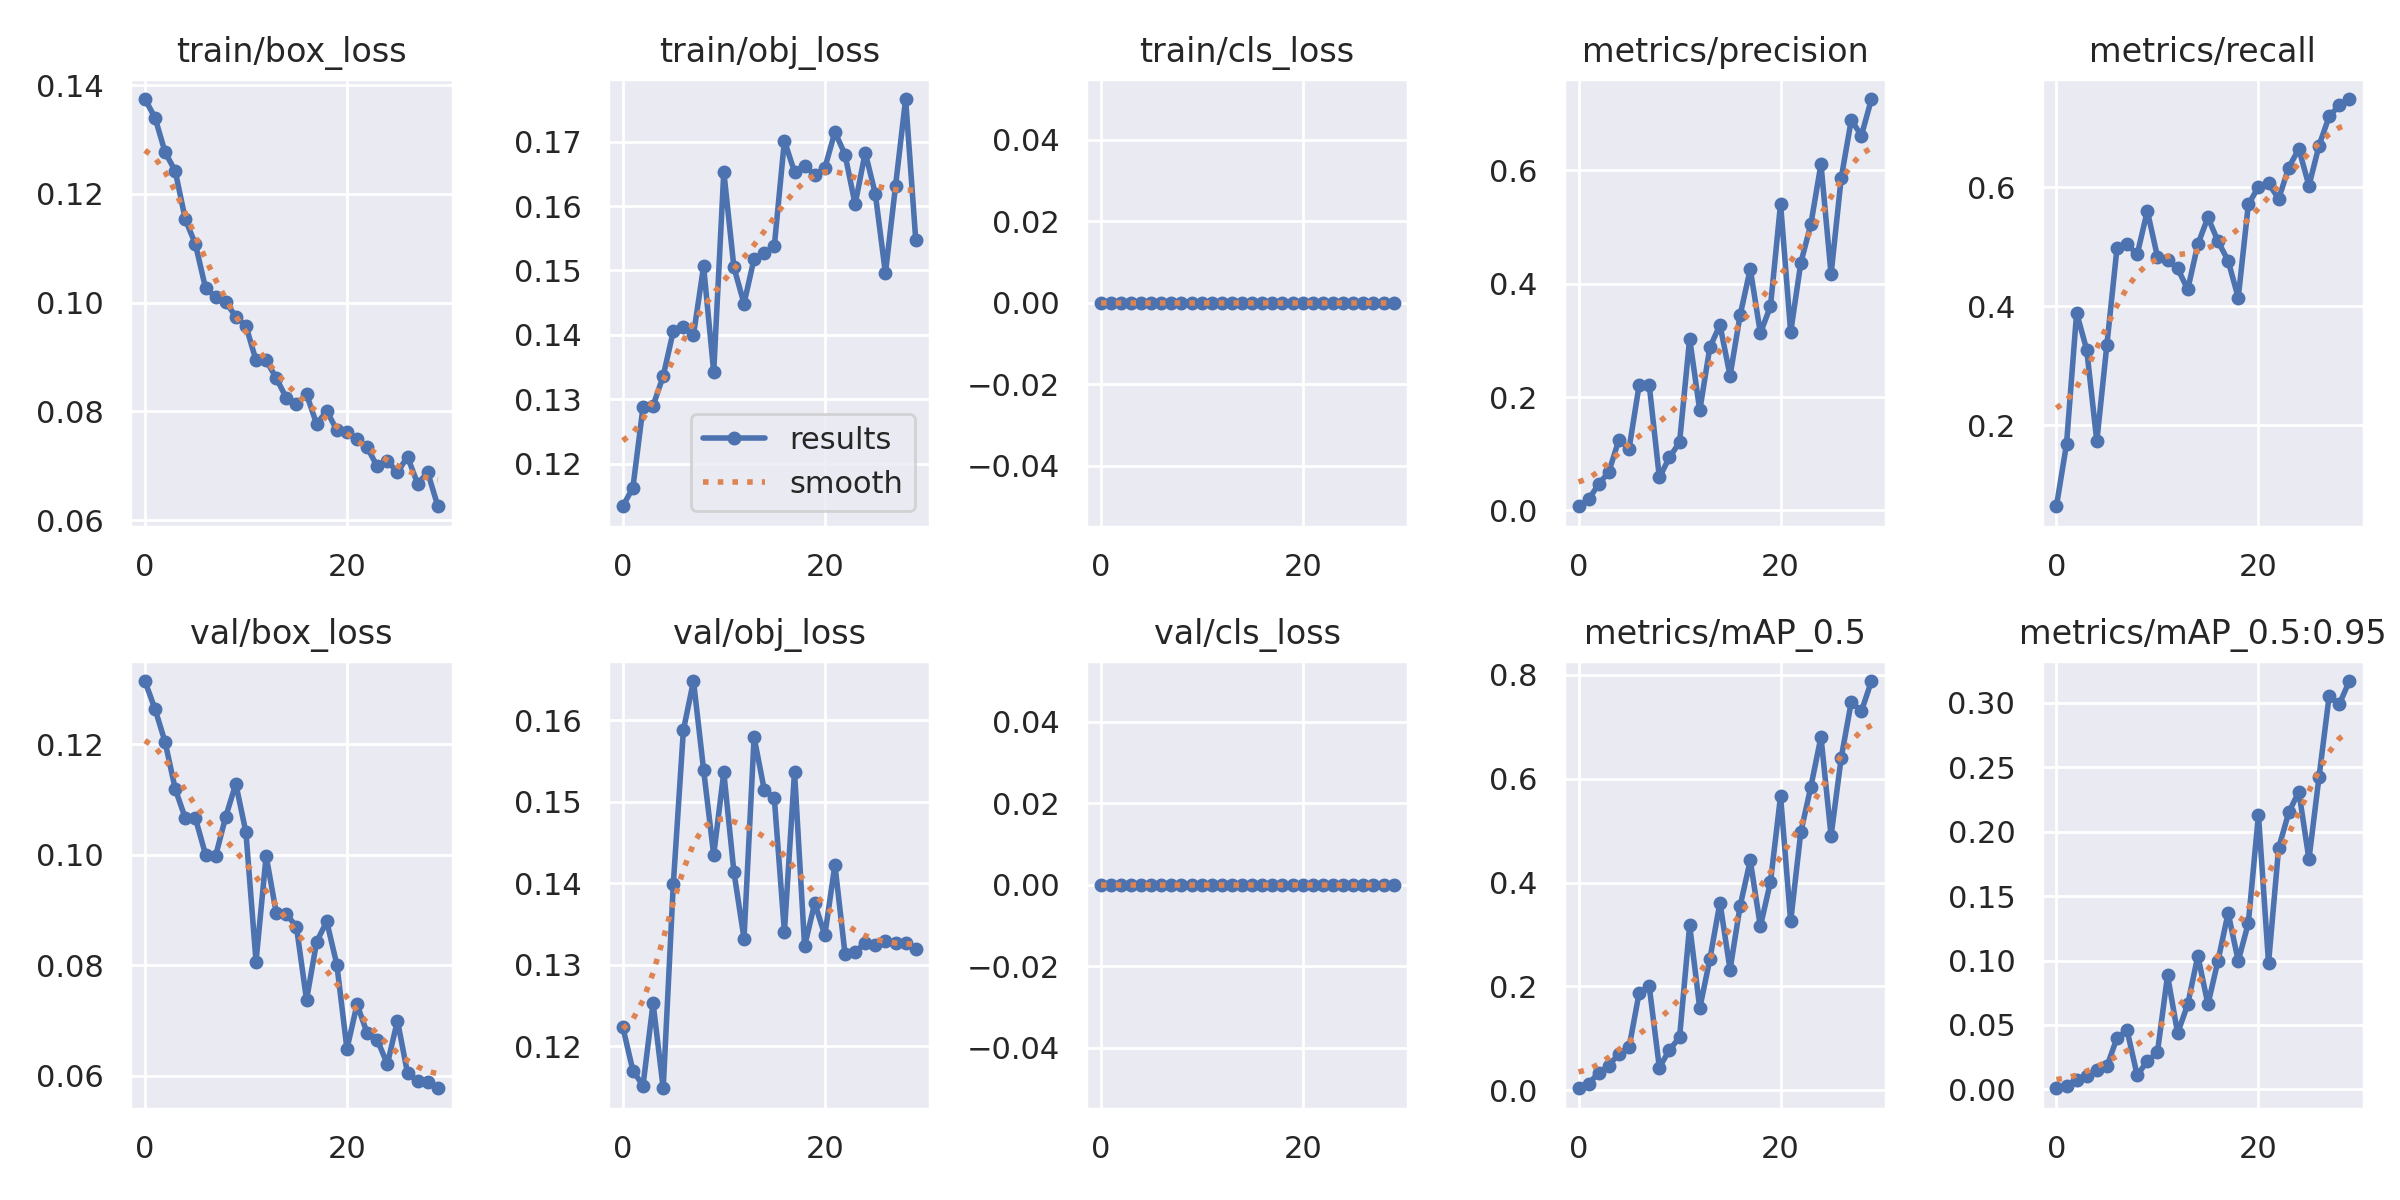

In [ ]:
from IPython.display import Image, display
Image(filename='runs/train/yolov5n_results/results.png')


In [ ]:
!python detect.py \
       --weights runs/train/yolov5n_results/weights/best.pt \
    --img 640 \
    --conf 0.25 \
    --source /content/dataset/test/images \
    --name yolov5n_civilian_detect_smallfont \
    --line-thickness 1


detect: weights=['runs/train/yolov5n_results/weights/best.pt'], source=/content/dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolov5n_civilian_detect_smallfont, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5n summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
image 1/14 /content/dataset/test/images/-4K-1_-Av335688642-P1-_mp4-0005_jpg.rf.400320a659499fdf96dea882e75c4f32.jpg: 640x640 75 Civilians, 6.0ms
image 2/14 /content/dataset/test/images/-4K-1_-Av335688642-P1-_mp4-0030_jpg.rf.14e6f2024aec8efe2bf45b40c01d5819.jpg: 

In [ ]:
import os

detect_dir = 'runs/detect'
print("Available detection outputs:")
print(os.listdir(detect_dir))


Available detection outputs:
['yolov5n_civilian_detect_smallfont']


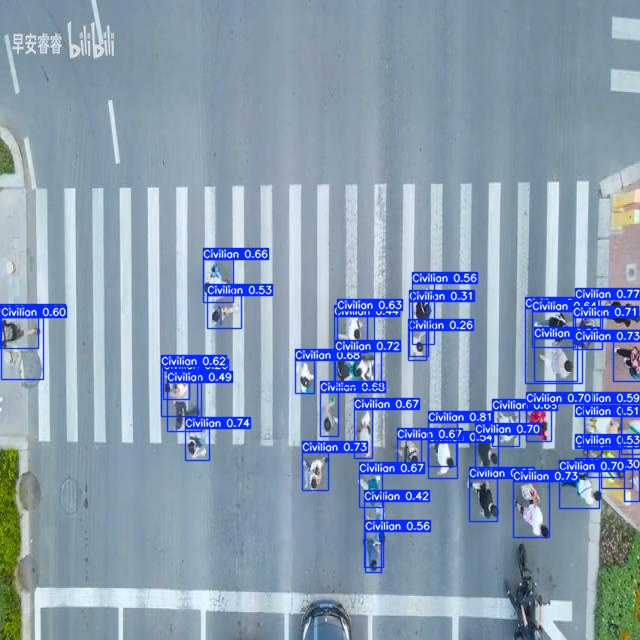

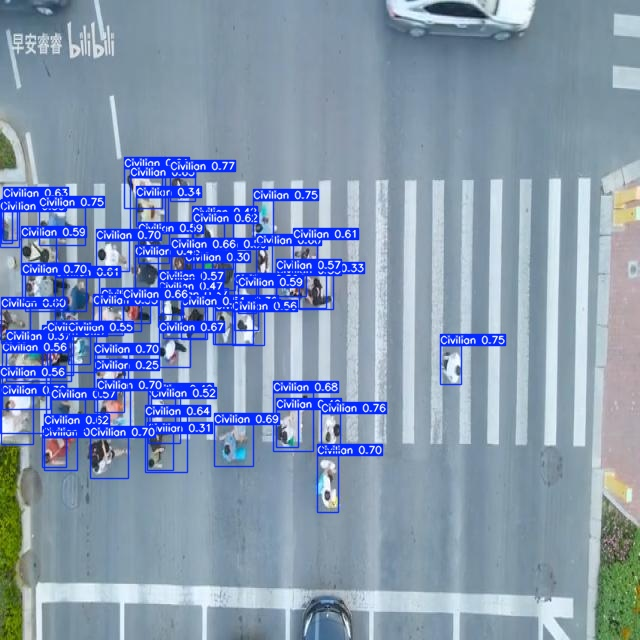

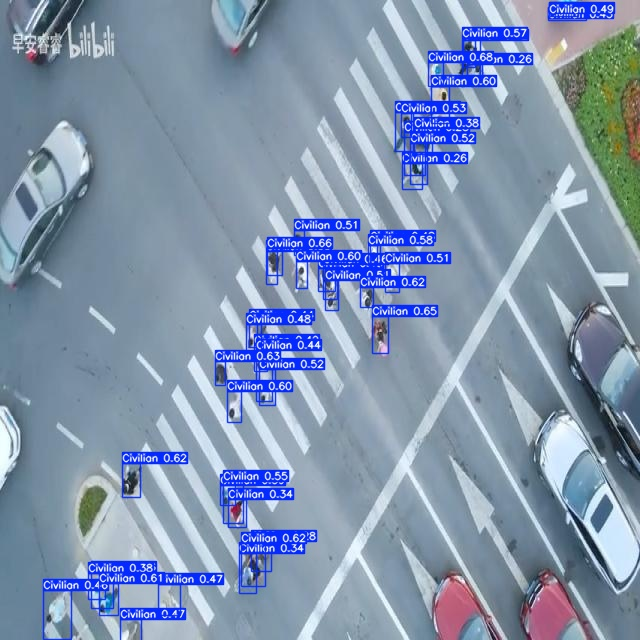

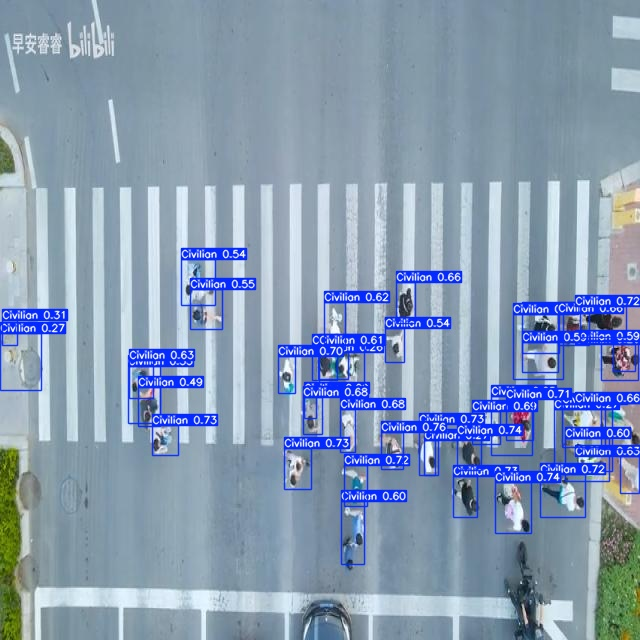

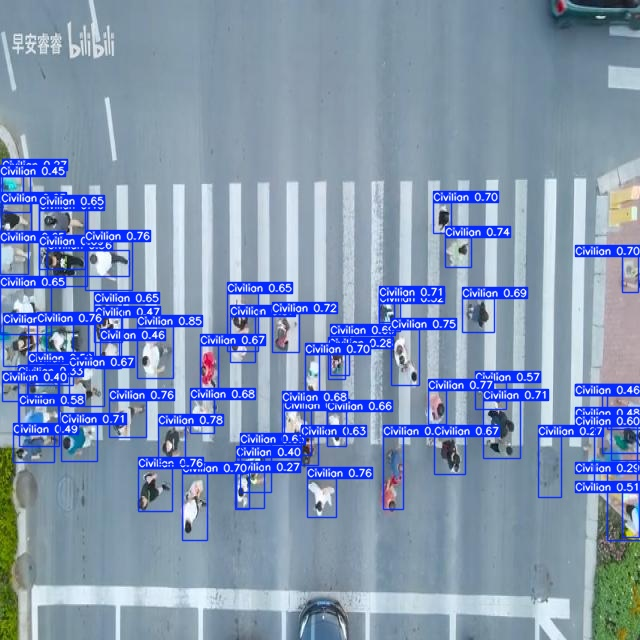

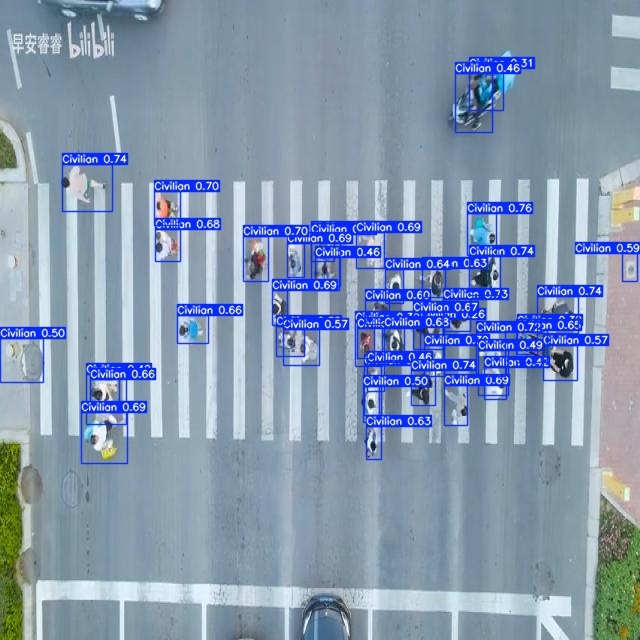

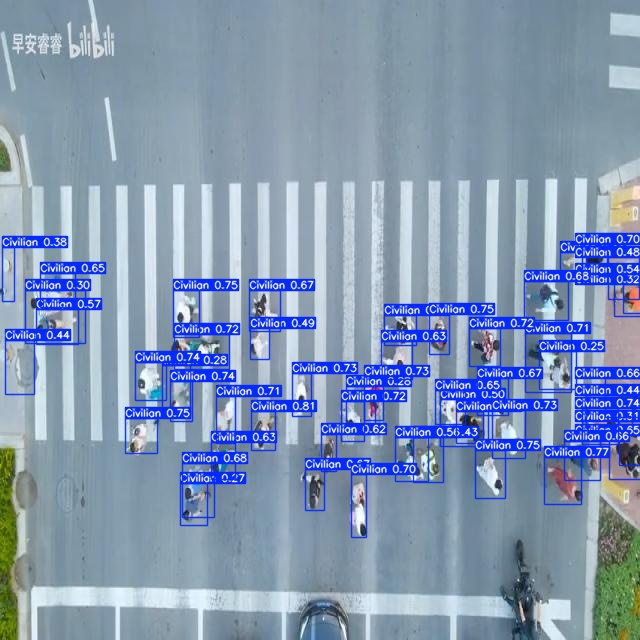

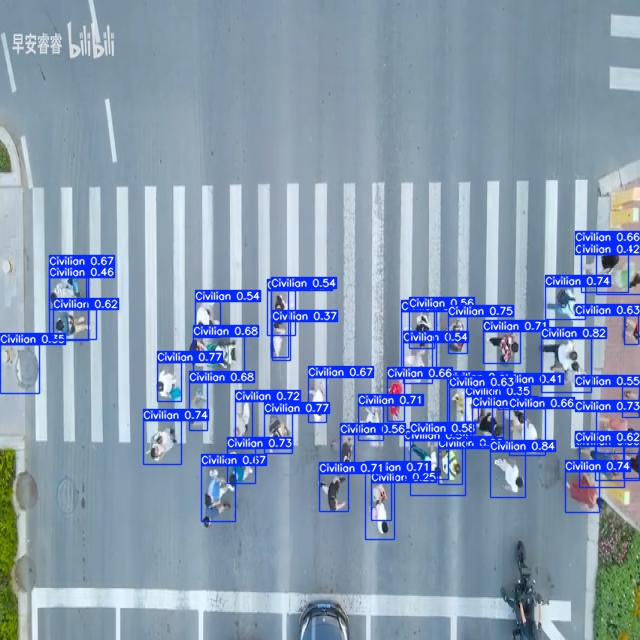

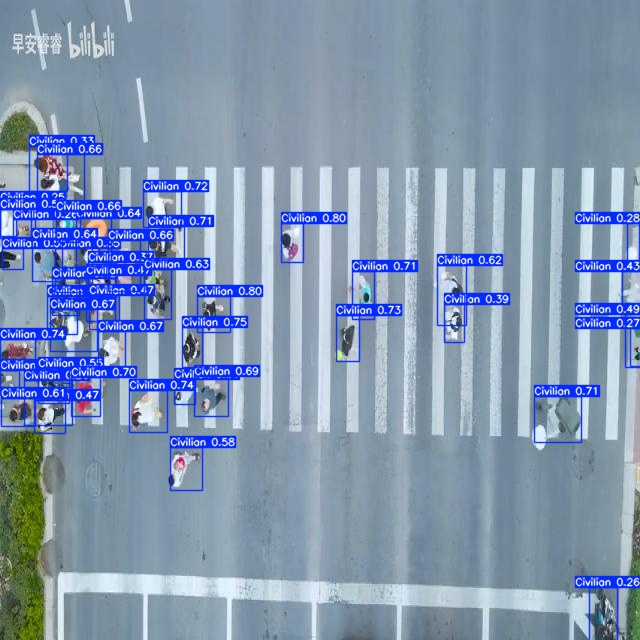

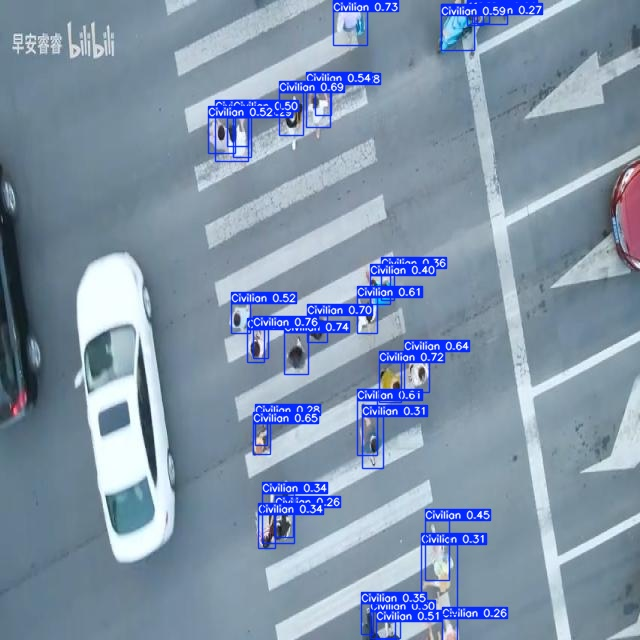

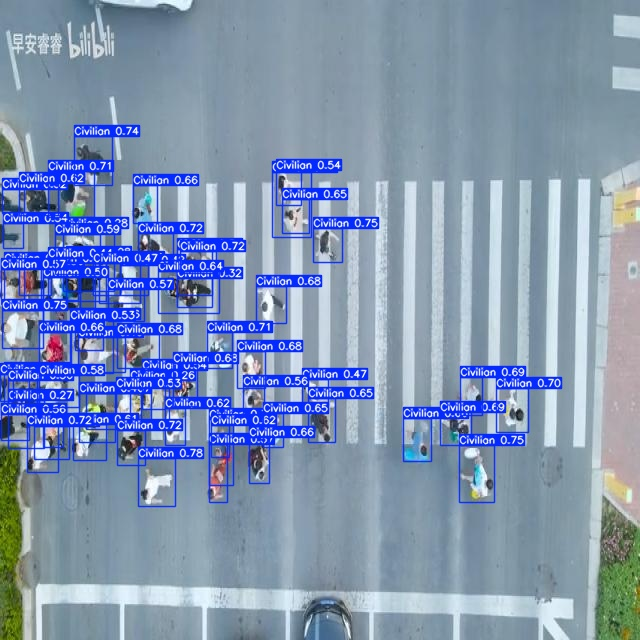

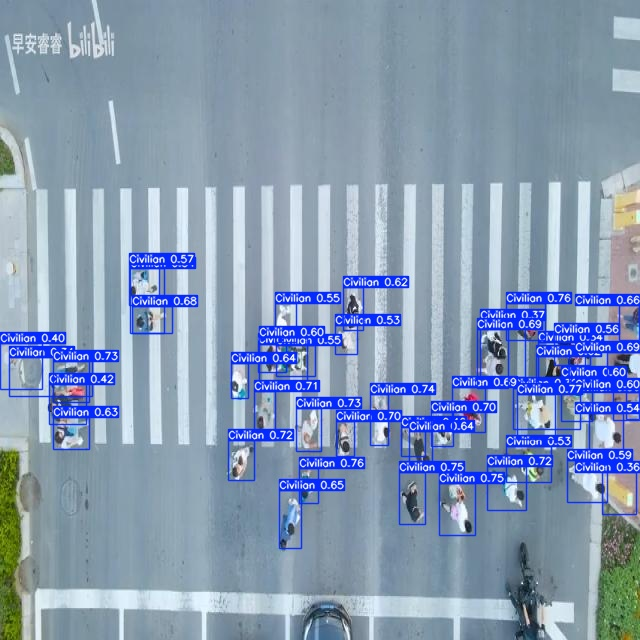

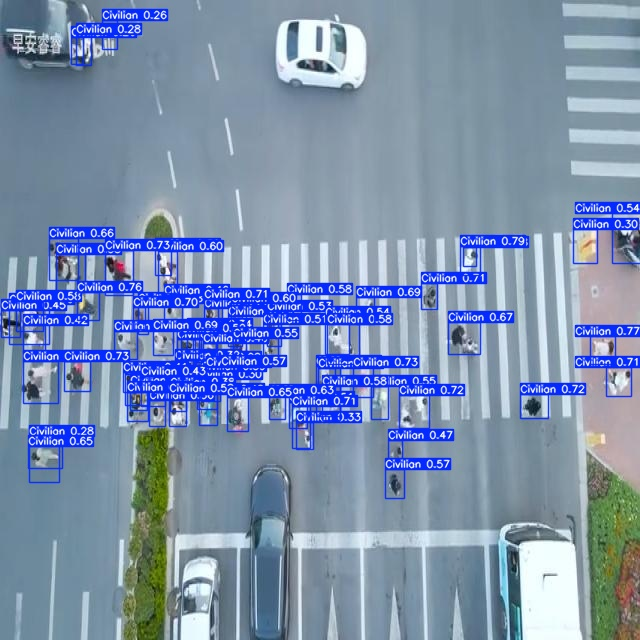

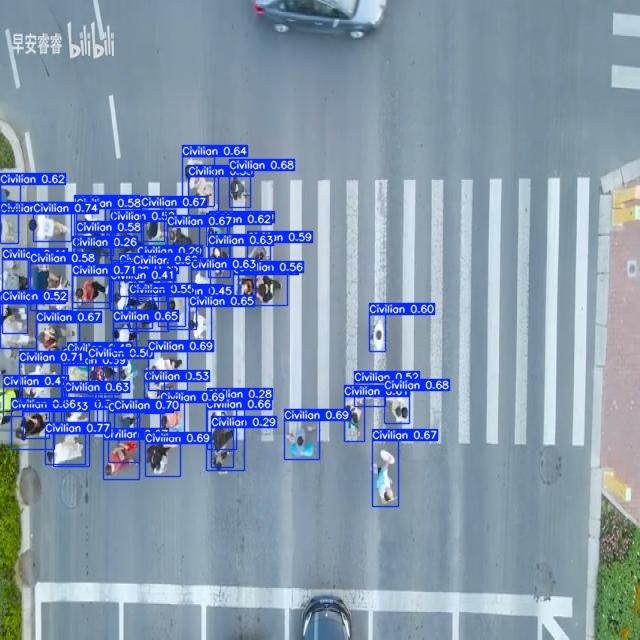

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/yolov5n_civilian_detect_smallfont/*.jpg'):
    display(Image(filename=image_path))


In [ ]:
!gdown --id "1GUYyiBfbsT6KXXCh8KnyF0lyV4Zw_Kvv"


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1GUYyiBfbsT6KXXCh8KnyF0lyV4Zw_Kvv
To: /content/yolov5/Test_footage.mp4
100% 21.8M/21.8M [00:00<00:00, 84.6MB/s]


In [ ]:
uploaded_video = "/content/yolov5/Test_footage.mp4"


In [ ]:
!python detect.py \
    --weights runs/train/yolov5n_results/weights/best.pt \
    --img 640 \
    --conf 0.25 \
    --source {uploaded_video}


detect: weights=['runs/train/yolov5n_results/weights/best.pt'], source=/content/yolov5/Test_footage.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5n summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
video 1/1 (1/660) /content/yolov5/Test_footage.mp4: 288x640 4 Civilians, 54.8ms
video 1/1 (2/660) /content/yolov5/Test_footage.mp4: 288x640 4 Civilians, 6.7ms
video 1/1 (3/660) /content/yolov5/Test_footage.mp4: 288x640 4 Civilians, 5.9ms
video 1/1 (4/660) /content/yolov5/Test_footage.mp4

In [ ]:
import os
os.path.exists("/content/yolov5/runs/detect/exp/Test_footage.mp4")


True

In [ ]:
!ffmpeg -i /content/yolov5/runs/detect/exp/Test_footage.mp4 \
       -vcodec libx264 -acodec aac \
       /content/converted_output.mp4


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Upload your own surveillance here: 👇👇

In [ ]:
from IPython.display import Video
Video("/content/converted_output.mp4", embed=True)
